# Optimization Methods for Data Science (Project)

##### Authors: Mojtaba Amini , Kamile Dementaviciute

##### Implemetation of SFW and SVRF for a Neural Network
##### Deadline: 30/08/2022

### Loading necessary libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from random import random
from random import seed

# Common imports
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
np.random.seed(123)
from sklearn.model_selection import train_test_split
import seaborn as sns
import random 
import math
import time
import pathlib
# from keras.datasets import reuters
from keras.datasets import cifar10
from sklearn.utils import shuffle



#from Funct import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from PIL import Image
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
!pip install xlrd
!pip install openpyxl
!apt update
!apt install ffmpeg libsm6 libxext6 -y
!pip install opencv-python
!pip install --upgrade pip

import xlrd
import openpyxl
import cv2

2022-09-12 17:26:21.502527: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-12 17:26:21.502569: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 12.9 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 27.7 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
Get:1 http://

### Load Dataset


In [ ]:
def load_data(data_type="Simple"):

  seed(30)

  if data_type=="Simple":

    import sklearn.datasets
    from sklearn.model_selection import train_test_split

    X, Y = datasets.make_classification(n_samples=8000, n_features=2, random_state=123, n_redundant= 0, scale=20, shift=10)
    X = X*0.1 # just to reduce the order of values

    X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state = 123) 

    shape_X = X.shape
    shape_Y = Y.shape
    m = (X.size)/shape_X[1] 

    print ('The shape of X is: ' + str(shape_X))
    print ('The shape of Y is: ' + str(shape_Y))
    print ('We have m = %d training examples!' % (m))
    print(f"Train size of X= {X_train.shape[0]}\tTest size = {X_test.shape[0]}")
    #Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(X[:, 0][Y == 0], X[:, 1][Y == 0], 'r^')
    plt.plot(X[:, 0][ Y== 1], X[:, 1][Y == 1], 'bs')
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title('Random Classification Data with 2 classes')


  elif data_type=="mnist":
    
    (x_train_full, y_tr), (x_te, y_te) = tf.keras.datasets.mnist.load_data()
    # Rescale the pixel values
    x_train_full = x_train_full.astype('float32') / 255
    x_te = x_te.astype('float32') / 255
    # Flatten the arrays
    x_tr = x_train_full.reshape((len(x_train_full), np.prod(x_train_full.shape[1:])))
    x_te = x_te.reshape((len(x_te), np.prod(x_te.shape[1:])))
    y_train = y_tr[(y_tr==0) | (y_tr==1)]
    x_train = x_tr[(y_tr==0) | (y_tr==1)]
    y_test = y_te[(y_te==0) | (y_te==1)]
    x_test = x_te[(y_te==0) | (y_te==1)]
    n=10
    print(f"Train size of X= {x_train.shape[0]}\tTest size = {x_test.shape[0]}")
    plt.figure(figsize=(20, 4))
    for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.savefig("mnist.png",dpi=300)
    plt.show()


  

  elif data_type=="fashion mnist":
    
    (x_train_full, y_tr), (x_te, y_te) = tf.keras.datasets.fashion_mnist.load_data()
    # Rescale the pixel values
    x_train_full = x_train_full.astype('float32') / 255
    x_te = x_te.astype('float32') / 255
    # Flatten the arrays
    x_tr = x_train_full.reshape((len(x_train_full), np.prod(x_train_full.shape[1:])))
    x_te = x_te.reshape((len(x_te), np.prod(x_te.shape[1:])))
    y_train = y_tr[(y_tr==0) | (y_tr==1)]
    x_train = x_tr[(y_tr==0) | (y_tr==1)]
    y_test = y_te[(y_te==0) | (y_te==1)]
    x_test = x_te[(y_te==0) | (y_te==1)]
    n=10
    print(f"Train size of X= {x_train.shape[0]}\tTest size = {x_test.shape[0]}")
    plt.figure(figsize=(20, 4))
    
    for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.savefig("fashion_mnist.png",dpi=300)
    plt.show()



  elif data_type=="cifar10":
    
    (x_train_full, y_tr), (x_te, y_te) = cifar10.load_data()

    x_train_full = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train_full])
    x_te = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_te])

    # Rescale the pixel values
    x_train_full = x_train_full.astype('float32') / 255
    x_te = x_te.astype('float32') / 255

    
    # Flatten the arrays
    x_tr = x_train_full.reshape((len(x_train_full), np.prod(x_train_full.shape[1:])))
    x_te = x_te.reshape((len(x_te), np.prod(x_te.shape[1:])))

    y_tr = y_tr.T[0]
    y_te = y_te.T[0]

    y_train = y_tr[(y_tr==7) | (y_tr==1)]
    x_train = x_tr[(y_tr==7) | (y_tr==1)]
    y_test = y_te[(y_te==7) | (y_te==1)]
    x_test = x_te[(y_te==7) | (y_te==1)]
    n=10
    print(f"Train size of X= {x_train.shape[0]}\tTest size = {x_test.shape[0]}")
    plt.figure(figsize=(20, 4))
    for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(32, 32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
    plt.savefig("cifar10.png",dpi=300)
    plt.show()




  elif data_type=="flowers":

    dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
    data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
    data_dir = pathlib.Path(data_dir)
    
    train_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,seed=123,subset="training",image_size=(180, 180), batch_size=None)
    val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,validation_split=0.2,seed=123,subset="validation",image_size=(180, 180), batch_size=None)


    x_train_full = []
    y_tr = []
    x_te = []
    y_te = []

    for x, y in train_ds:
      a = x.numpy().astype("uint8")
      b = y.numpy().astype("int")
      x_train_full.append(a)
      y_tr.append(b)

    for x, y in val_ds:
      a = x.numpy().astype("uint8")
      b = y.numpy().astype("int")
      x_te.append(a)
      y_te.append(b)

    x_train_full = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train_full])
    x_te = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_te])

    x_train_full = np.asarray(x_train_full)
    x_te = np.asarray(x_te)
    y_tr = np.asarray(y_tr)
    y_te = np.asarray(y_te)

    # Rescale the pixel values
    x_train_full = x_train_full.astype('float32') / 255
    x_te = x_te.astype('float32') / 255


    # Flatten the arrays
    x_tr = x_train_full.reshape((len(x_train_full), np.prod(x_train_full.shape[1:])))
    x_te = x_te.reshape((len(x_te), np.prod(x_te.shape[1:])))



    y_train = y_tr[(y_tr==0) | (y_tr==1)]
    x_train = x_tr[(y_tr==0) | (y_tr==1)]
    y_test = y_te[(y_te==0) | (y_te==1)]
    x_test = x_te[(y_te==0) | (y_te==1)]
    n=10
    print(f"Train size of X= {x_train.shape[0]}\tTest size = {x_test.shape[0]}")
    plt.figure(figsize=(20, 4))
    for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test[i].reshape(180,180))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

    plt.savefig("flowers.png",dpi=300)  
    plt.show()

  elif data_type=="moon":

    import sklearn.datasets
    from sklearn.model_selection import train_test_split
    X,Y = sklearn.datasets.make_moons(n_samples=15000, noise=.2)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=123)
 
  elif data_type=="circle":
    import sklearn.datasets
    from sklearn.model_selection import train_test_split
    X,Y = sklearn.datasets.make_circles(n_samples=15000, noise=.2)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=123)

  elif data_type=="gaussian":

    import sklearn.datasets
    from sklearn.model_selection import train_test_split
    X,Y = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=15000, n_features=2, n_classes=2, shuffle=True, random_state=None)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=123)

  elif data_type=="pumpkin":

    from sklearn.model_selection import train_test_split
    df = pd.read_excel('/work/Pumpkin_Seeds_Dataset.xlsx')
    a = pd.DataFrame(df).to_numpy()
    y = np.zeros(len(a))
    X = []
    for i in range(0,len(a)):
        X.append(np.zeros(len(a[0])-1))
    for i in range(0, len(a)):
        b = a[i]
        c = []
        for j in range(0, len(b)-1):
            c.append(b[j])
        X[i] = c
        if a[i][-1] == "Çerçevelik":
            y[i] = 0
        else:
            y[i] = 1
    X = np.array(X)
    y = np.array(y)

    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)


  elif data_type=="pistachio":
    from sklearn.model_selection import train_test_split
    df = pd.read_excel('/work/Pistachio_28_Features_Dataset.xlsx')
    a = pd.DataFrame(df).to_numpy()
    y = np.zeros(len(a))
    X = []

    # print(df)

    for i in range(0,len(a)):
        X.append(np.zeros(len(a[0])-1))

    for i in range(0, len(a)):
        b = a[i]
        c = []
        for j in range(0, len(b)-1):
            c.append(b[j])
        X[i] = c
        if a[i][-1] == "Kirmizi_Pistachio":
            y[i] = 0
        else:
            y[i] = 1

            
    X = np.array(X)
    y = np.array(y)

    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)



  elif data_type=="rice":
    from sklearn.model_selection import train_test_split
    df = pd.read_excel('/work/Rice_Cammeo_Osmancik.xlsx')
    a = pd.DataFrame(df).to_numpy()
    y = np.zeros(len(a))
    X = []

    # print(df)

    for i in range(0,len(a)):
        X.append(np.zeros(len(a[0])-1))

    for i in range(0, len(a)):
        b = a[i]
        c = []
        for j in range(0, len(b)-1):
            c.append(b[j])
        X[i] = c
        if a[i][-1] == "Cammeo":
            y[i] = 0
        else:
            y[i] = 1

            
    X = np.array(X)
    y = np.array(y)

    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

  elif data_type=="cancer":
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()
    y = data["target"]
    X = data [ "data"]
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=123)

  elif data_type=="fruit":
    df = pd.read_csv('citrus.csv')
    df.name[df.name == 'orange'] =0
    df.name[df.name =='grapefruit'] =1
    dataset= df.values
    X = dataset[:,1:6]
    y = dataset[:,0]
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()
    X_scale = min_max_scaler.fit_transform(X)
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3)


  return x_train,y_train,x_test,y_test

### Required Functions

In [ ]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    return 1/(1+np.exp(-z))
    
    
def relu(x):
    return np.maximum(0.0, x)

    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X

In [ ]:
def predict(X, y, parameters):
    
    m = X.shape[0]
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = forward_propagation(X, parameters)

    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    p = np.sum((p == y)/m)
        
    return p

### Building Neural Network with one layer

<b><mark> Here we are going to define a one layer neural-network</b></mark>
    


    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    

In [ ]:
def layer_sizes(X, Y, hidden_units = 16):

  n_x = X.shape[1] # size of input layer
  n_h = hidden_units # we have 3 hidden units
  n_y = 1 # size of output layer
    
  return (n_x, n_h, n_y)


    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing the parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
   

In [ ]:
def initialize_parameters(n_x, n_h, n_y):

  np.random.seed(2) 
  W1 = np.random.randn(n_h,n_x) * 0.01
  b1 = np.zeros((n_h,1))
  W2 = np.random.randn(n_y,n_h) * 0.01
  b2 = np.zeros((n_y,1))
  
  parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
  return parameters


  # mnist: 0.00001
  # moon: 0.01
  # fashion mnist: 0.0001


    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing the parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"


In [ ]:
def forward_propagation(X, parameters, activation="tanh"):

  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]

  Z1 = np.dot(W1,X.T) + b1

  if activation=="relu":
    A1 = relu(Z1)
  elif activation=="tanh":
    A1 = np.tanh(Z1)

  Z2 = np.dot(W2,A1) + b2
  A2 = sigmoid(Z2)

  # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backpropagation
  cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
  return A2, cache

 
    Computes the cross-entropy cost 
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy

The cost funcion is : 
$$J= -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right))$$


In [ ]:
def compute_cost(A2, Y):

  m = Y.shape[0] # number of example
  # Compute the cross-entropy cost
  logprobs = np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
  cost = (-1/m) * np.sum(logprobs)  
  cost = float(np.squeeze(cost))  
  
  return cost


    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters


<b><mark>The forward propagation:</b></mark>

$$ Z1 = W1 \times X  + b1 $$

$ A1 = tanh(Z1)$ or $Relu(Z1) $

$$ Z2 = W2 \times A1  + b2 $$

$$ A2 = σ(Z2) $$


<b> <mark> The cost funcion is : </b></mark>
$$J= -\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(A2^{(i)}\right) + (1-y^{(i)})\log\left(1- A2^{(i)}\right))$$
$m$ stands for the number of samples.


<b><mark> The derivative of one layer network </b></mark>

Cost = $ - (y\log\left(A2\right) + (1-y)\log\left(1- A2\right))$ (for a single sample)

dZ2 = $ \frac{\partial Cost}{\partial Z2} = \frac{\partial Cost}{\partial A2} \times \frac{\partial A2}{\partial Z2}$

$ \frac{\partial Cost}{\partial A2}$ = $ - \frac{y}{A2} + \frac{1-y}{1-A2}$

$ \frac{\partial A2}{\partial Z2}$ = $A2 \times (1-A2)$

dZ2 = $  - y \times ( 1-A2) + (1-y) \times (A2) = - y + y \times A2 + A2 - y \times A2 = A2 -y $


<b><mark> So lets compute the needed derivatives: </b></mark>

$\frac{\partial J}{\partial W2}  =  \frac{1}{m} \sum\limits_{i = 1}^{m} \frac{\partial Cost}{\partial W2} =  \frac{1}{m} \sum\limits_{i = 1}^{m} \frac{\partial Cost}{\partial Z2}\frac{\partial Z2}{\partial W2} $

$\frac{\partial Z2}{\partial W2} = A1$

$\frac{\partial J}{\partial W2} =  \frac{1}{m} \sum\limits_{i = 1}^{m} (A2-y) \times A1$

$\frac{\partial J}{\partial b2}  =  \frac{1}{m} \sum\limits_{i = 1}^{m} \frac{\partial Cost}{\partial b2} =  \frac{1}{m} \sum\limits_{i = 1}^{m} \frac{\partial Cost}{\partial Z2}\frac{\partial Z2}{\partial b2} $

$\frac{\partial Z2}{\partial b2} = 1$


$\frac{\partial J}{\partial b2} =  \frac{1}{m} \sum\limits_{i = 1}^{m} (A2-y) \times 1$


In [ ]:
def backward_propagation(parameters, cache, X, Y,activation="relu"):

  m = X.shape[0]

  # First, retrieve W1 and W2 from the dictionary "parameters".
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"]
  
  # Retrieve also A1 and A2 from dictionary "cache".
  A1 = cache["A1"]
  A2 = cache["A2"]
  Z1 = cache["Z1"]
  Z2 = cache["Z2"]

  # Backward propagation: calculate dW1, db1, dW2, db2. 
  dZ2 = A2 - Y
  dW2 = (1/m) * np.dot(dZ2,A1.T)
  db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
  dA1 = np.dot(W2.T,dZ2) 
  
  if activation=="relu":
    dZ1 = np.array(dA1, copy=True)
    dZ1[Z1 <= 0] = 0 # gradient of relu
    #dZ1[ Z1>0  ] = 1

  elif activation=="tanh":
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))

  dW1 = (1/m) *(np.dot(dZ1,X))
  db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
  
  grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}

  return grads

### Frank-Wolfe finding direction implementation for One-layer

In [ ]:
def FW_find_direction_one_layer(d, grads, m_grads , momentum = False):


  if momentum == False:
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
  elif momentum == True:
    dW1 = m_grads["m_dW1"]
    db1 = m_grads["m_db1"]
    dW2 = m_grads["m_dW2"]
    db2 = m_grads["m_db2"]
 

  temp = np.concatenate((
  dW1.reshape(-1),
  dW2.reshape(-1),
  db1.reshape(-1),
  db2.reshape(-1),
  ))

  

  Diameter = d
  x_k_hat = np.zeros(temp.shape)
  x_k_hat[np.abs(temp).argmax()] = - np.sign(temp[np.abs(temp).argmax()]) * Diameter # ASK PROFESSOR ABOUT DIAMETER IMPLEMENTATION



  dW1_hat = x_k_hat[0:np.prod(dW1.shape)].reshape(dW1.shape)
  dW2_hat = x_k_hat[np.prod(dW1.shape):np.prod(dW2.shape)+np.prod(dW1.shape)].reshape(dW2.shape)
  db1_hat = x_k_hat[np.prod(dW2.shape)+np.prod(dW1.shape):np.prod(dW2.shape)+np.prod(dW1.shape)+np.prod(db1.shape)].reshape(db1.shape)
  db2_hat = x_k_hat[np.prod(dW2.shape)+np.prod(dW1.shape)+np.prod(db1.shape):].reshape(db2.shape)


  Mgrads = {"dW1_hat": dW1_hat,"dW2_hat": dW2_hat,"db1_hat": db1_hat,"db2_hat": db2_hat}

  return Mgrads


    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 


In [ ]:
def update_parameters(parameters, grads,  Mgrads, learning_rate , method = "FW"):

  # Retrieve each parameter from the dictionary "parameters"
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"] 
     
  # gradient
  dW1 = grads["dW1"]
  db1 = grads["db1"]
  dW2 = grads["dW2"]
  db2 = grads["db2"] 

  # Retrieve each gradient from the dictionary "grads"
  dW1_hat = Mgrads["dW1_hat"]
  db1_hat = Mgrads["db1_hat"]
  dW2_hat = Mgrads["dW2_hat"]
  db2_hat = Mgrads["db2_hat"]

  # Update rule for each parameter
  if method=="FW":
    W1 = W1 + learning_rate * (dW1_hat - W1)
    b1 = b1 + learning_rate * (db1_hat - b1)
    W2 = W2 + learning_rate * (dW2_hat - W2)
    b2 = b2 + learning_rate * (db2_hat - b2)
  elif method=="GD":
    W1 = W1 + learning_rate * dW1
    b1 = b1 + learning_rate * db1
    W2 = W2 + learning_rate * dW2
    b2 = b2 + learning_rate * db2


  parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2}
    
  return parameters

In [ ]:
def simple_FW(X, Y, itr , m_grads , parameters, activation , learning_rate, cost_plot , sum_plot, d):

  # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
  A2, cache = forward_propagation(X, parameters , activation=activation)

  # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
  cost = compute_cost(A2, Y)

  # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
  grads = backward_propagation(parameters, cache, X, Y)
  Mgrads = FW_find_direction_one_layer(d, grads, m_grads)

  #grads_hat = Mgrads
  parameters = update_parameters(parameters,grads , Mgrads, learning_rate , method = "FW")
  
  if (itr+1) % 10 == 0:
    cost_plot.append(cost)
    print ("Cost after iteration %i: %f" %(itr+1, cost))
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"] 
    sum_plot.append(np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2)))

  return parameters , cost , cost_plot , sum_plot


In [ ]:
def stochastic_FW(X, Y, batch_size, m_grads , parameters, activation , learning_rate, d):

    # choose_from = []
    # for batch_num in range(0,X.shape[0],batch_size):
    #     choose_from.append(batch_num)
    # random.shuffle(choose_from)
    #X, Y = shuffle(X,Y)
    batch_num = int(X.shape[0]/batch_size)
    #print(" batch_num is :", batch_num)

    for i in range(0,batch_num):

        rand_num = random.random()
        start = int(rand_num*X.shape[0])
        #print ("start is : ", start)
        while True:
            if start +batch_size > X.shape[0] :
                rand_num = random.random()
                start = int(rand_num*X.shape[0])
            else:
                break

        X_batch = X[start:start +batch_size, :]
        Y_batch = Y[start:start +batch_size, ]

        
        A2, cache = forward_propagation(X_batch, parameters)
        cost = compute_cost(A2, Y_batch)
        grads = backward_propagation(parameters, cache, X_batch, Y_batch)
        Mgrads = FW_find_direction_one_layer(d, grads , m_grads)

        parameters = update_parameters(parameters,grads , Mgrads, learning_rate , method = "FW")

    
        # cost = compute_cost(A2, Y_batch)
        # cost_plot.append(cost)

    
    return parameters


### SVRF

In [ ]:
def SVRF(X, Y, batch_size, m_grads , parameters, activation , learning_rate, d, m, cost_plot):


    # Exact gradient calculations
    A2, cache = forward_propagation(X, parameters)
    # cost = compute_cost(A2, Y)
    exact_grads = backward_propagation(parameters, cache, X, Y)
    exact_dW1 = exact_grads["dW1"]
    exact_db1 = exact_grads["db1"]
    exact_dW2 = exact_grads["dW2"]
    exact_db2 = exact_grads["db2"]

    parameters_new = parameters.copy()


    for internal in range(0,m):
        
        rand_num = random.random()
        start = int(rand_num*X.shape[0])

        while True:
            if start +batch_size > X.shape[0] :
                rand_num = random.random()
                start = int(rand_num*X.shape[0])
            else:
                break

        X_batch = X[start:start +batch_size, :]
        Y_batch = Y[start:start +batch_size, ]


        '''minibatch grad with OLD param'''
        A2, cache = forward_propagation(X_batch, parameters)
        stoch_grad_old = backward_propagation(parameters, cache, X_batch, Y_batch)


        '''minibatch grad with NEW param'''
        A2, cache = forward_propagation(X_batch, parameters_new)
        stoch_grad_new = backward_propagation(parameters_new, cache, X_batch, Y_batch)


        dW1_new = stoch_grad_new["dW1"]
        db1_new = stoch_grad_new["db1"]
        dW2_new = stoch_grad_new["dW2"]
        db2_new = stoch_grad_new["db2"]

        dW1_old = stoch_grad_old["dW1"]
        db1_old = stoch_grad_old["db1"]
        dW2_old = stoch_grad_old["dW2"]
        db2_old = stoch_grad_old["db2"]


        dW1 = dW1_new - dW1_old + exact_dW1
        db1 = db1_new - db1_old + exact_db1
        dW2 = dW2_new - dW2_old + exact_dW2
        db2 = db2_new - db2_old + exact_db2
        grads = {"dW1": dW1,"db1": db1,"dW2": dW2,"db2": db2}


        Mgrads = FW_find_direction_one_layer(d, grads, m_grads)
        parameters_new = update_parameters(parameters_new,grads, Mgrads, learning_rate , method = "FW")


        # cost = compute_cost(A2, Y_batch)
        # cost_plot.append(cost)
 
    
    return parameters_new, cost_plot

### One-Layer Neural Network Model

In [ ]:
# NN_model
def nn_model_one_layer(X, Y, x_test, y_test, learning_rate=0.1, momentum = 0.9, num_iterations = 10000,
             print_cost=False,activation="tanh", FW_Method = "simple", batch_size= 20 ,hidden_units = 16, d=3, m=20):
  
  n_x,n_h,n_y = layer_sizes(X, Y, hidden_units = hidden_units )


  # Initialize parameters
  parameters = initialize_parameters(n_x, n_h, n_y)
  W1 = parameters["W1"]
  b1 = parameters["b1"]
  W2 = parameters["W2"]
  b2 = parameters["b2"] 

  var_sum = np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2))
  print("This is the initial sum of the variables", var_sum)
  
  m_dW1=np.zeros(W1.shape)
  m_dW2=np.zeros(W2.shape)
  m_db1=np.zeros(b1.shape)
  m_db2=np.zeros(b2.shape)  
  m_grads = {"m_dW1": m_dW1,"m_db1": m_db1,"m_dW2": m_dW2,"m_db2": m_db2}


  # Loop (gradient descent)
  plot_cost=[]
  nog = [] #no of grads calculated
  acc = []
  CPU = []
  gradient= []
  cost_plot=[]
  sum_plot=[]
  start_time = time.time()

  print("Iteration Start =====================================")

  if FW_Method != "SVRF":

    for itr in range(0, num_iterations):

        
        if FW_Method=="Simple":

            parameters , cost , cost_plot , sum_plot = simple_FW(X, Y, itr ,m_grads , parameters,
                                                            activation ,learning_rate , cost_plot , sum_plot, d)

            A2, cache = forward_propagation(X, parameters)
            cost = compute_cost(A2, Y)
            
            cost_plot.append(cost)
            acc.append(predict(x_test, y_test, parameters))
            CPU.append(time.time() - start_time )
            # print ("Cost after iteration %i: %f" %(itr+1, cost))
            W1 = parameters["W1"]
            b1 = parameters["b1"]
            W2 = parameters["W2"]
            b2 = parameters["b2"] 
            sum_plot.append(np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2)))
    
        elif FW_Method=="SFW":

            parameters = stochastic_FW(X, Y, batch_size, m_grads , parameters, activation, learning_rate, d)
            A2, cache = forward_propagation(X, parameters)
            cost = compute_cost(A2, Y)

            # gradient.append(itr*X.shape[1]*X.shape[0]) # gradient calcs -------------
            gradient.append(itr) 

            cost_plot.append(cost)
            acc.append(predict(x_test, y_test, parameters))
            CPU.append(time.time() - start_time )
            print ("Cost after iteration %i: %f" %(itr+1, cost))
            W1 = parameters["W1"]
            b1 = parameters["b1"]
            W2 = parameters["W2"]
            b2 = parameters["b2"] 
            sum_plot.append(np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2)))
            
        elif FW_Method=="MSFW":
        
            parameters = Momentum_SFW(X, Y, batch_size, momentum, m_grads , parameters, activation, learning_rate, d)
            A2, cache = forward_propagation(X, parameters)
            cost = compute_cost(A2, Y)

            gradient.append(itr) 
            
            cost_plot.append(cost)
            acc.append(predict(x_test, y_test, parameters))
            CPU.append(time.time() - start_time )
            print ("Cost after iteration %i: %f" %(itr+1, cost))
            W1 = parameters["W1"]
            b1 = parameters["b1"]
            W2 = parameters["W2"]
            b2 = parameters["b2"] 
            sum_plot.append(np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2)))

        X, Y = shuffle(X,Y)


  if FW_Method=="SVRF":

    S = int((num_iterations * X.shape[0])/(batch_size *m))

    h=[]
    for i in range(0,x_train.shape[0],batch_size):
        h.append(i)

    sfw_iner= len(h)

    for itr in range(0, S):

        parameters, cost_plot = SVRF(X, Y, batch_size, m_grads , parameters, activation, learning_rate, d, m, cost_plot)
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)

        iteration = int((batch_size * m * (itr+1))/X.shape[0])

        while True:
            if iteration+1 > len(cost_plot) :
                cost_plot.append(cost)
                acc.append(predict(x_test, y_test, parameters))
                CPU.append(time.time() - start_time )

                # gradient.append(itr*m*X.shape[1]*X.shape[0]) # gradient calcs -------------

                gradient.append(itr*(m*2 + 1))


                print ("Cost after iteration %i: %f" %(int((itr*batch_size *m)/ X.shape[0])+1, cost))
                W1 = parameters["W1"]
                b1 = parameters["b1"]
                W2 = parameters["W2"]
                b2 = parameters["b2"] 
                sum_plot.append(np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2)))
            else:
                break

        X, Y = shuffle(X,Y)
    
    

  # Returns parameters learnt by the model. They can then be used to predict output
  plt.figure(figsize=(12,6))
  plt.subplot(3, 2, 1)

  plt.plot(cost_plot)
  plt.xlabel("Epoch")
  plt.ylabel("Cost Per iteration")
  plt.subplot(3, 2, 2)

  plt.plot(gradient,cost_plot)
  plt.xlabel("gradient calculated")
  plt.ylabel("Cost Per iteration")
  plt.subplot(3, 2, 3)

  plt.plot(acc)
  plt.xlabel("Epoch")
  plt.ylabel("Test set Accuracy")
  plt.subplot(3, 2, 4)

  plt.plot(gradient,acc)
  plt.xlabel("gradient calculated")
  plt.ylabel("Test set Accuracy")

  plt.subplot(3, 2, 5)

  plt.plot(sum_plot)
  plt.xlabel("Epoch")
  plt.ylabel("Sum of the variables")
  plt.subplot(3, 2, 6)

  plt.plot(gradient,sum_plot)
  plt.xlabel("gradient calculated")
  plt.ylabel("Sum of the variables")
  return parameters, cost_plot, nog, acc, CPU, sum_plot ,gradient

### Trainning Frank-Wolfe Method

<b><mark>First of all we have to assign all hyperparameters </b></mark>

<b><mark>Now we have to choose the data-set Type</b></mark>
<li> Simple
<li> mnist
<li> fashion mnist
<li> cifar10
<li> flowers
<li> moon
<li> circle
<li> gaussian
<li> pumpkin
<li> pistachio
<li> fruit






In [ ]:

x_train,y_train,x_test,y_test=load_data(data_type="fruit")

/tmp/ipykernel_88/359797838.py:308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name == 'orange'] =0
/tmp/ipykernel_88/359797838.py:309: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.name[df.name =='grapefruit'] =1


<b><mark> Now its time to run the model</b></mark>

### <b><mark> SFW</b></mark>
Configuration for Flower dataset:

    Number of Iterations: 100
    Hidden Layer Size: 64 
    Learning Rate: 0.0002 
    Batch size: 64
    Diameter: 10 
\
Configuration for Moon dataset:

    Number of Iterations: 200
    Hidden Layer Size: 64 
    Learning Rate: 0.0001 
    Batch size: 64
    Diameter: 5

### Run SFW

In [ ]:
# # fashion mnist
# nof_iteration=20
# size_hidden1= 32
# Lr_Rte = 0.001
# bch_size= 128
# diameter = 5
# Actvn_func= "relu"
# FW_type = "SFW"



# # mnist
# nof_iteration= 10
# size_hidden1= 16 
# Lr_Rte = 0.002
# bch_size= 32
# diameter = 3
# Actvn_func= "relu"
# FW_type = "SFW"



# # moon
# nof_iteration= 10
# size_hidden1= 16 
# Lr_Rte = 0.0008
# bch_size= 32
# diameter = 4
# Actvn_func= "relu"
# FW_type = "SFW"


# fruit
nof_iteration= 10
size_hidden1= 64
Lr_Rte = 0.001
bch_size= 32
diameter = 20
Actvn_func= "relu"
FW_type = "SFW"

This is the initial sum of the variables 3.137012649068569
Iteration Start =====================================
Cost after iteration 1: 0.693037
Cost after iteration 2: 0.687704
Cost after iteration 3: 0.659205
Cost after iteration 4: 0.571525
Cost after iteration 5: 0.495244
Cost after iteration 6: 0.472016
Cost after iteration 7: 0.432429
Cost after iteration 8: 0.411913
Cost after iteration 9: 0.405153
Cost after iteration 10: 0.393933
Accuracy:  0.9043333333333334
This is the sum of variables at the end of calculation 9.61250511943523


0.393932691730819

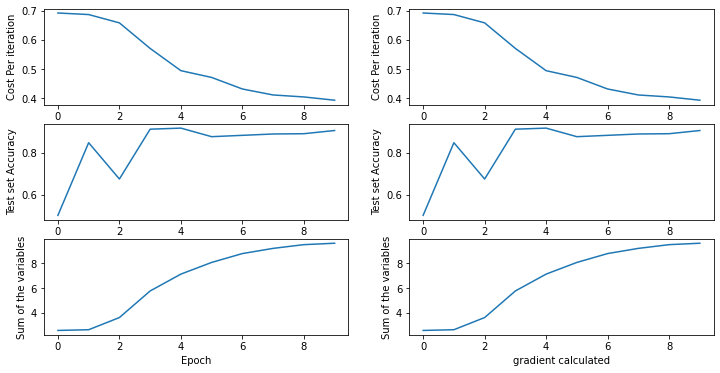

In [ ]:
parameters_SFW,cost_plot_SFW, nog_SFW, acc_SFW, time_SFW, sum_SFW , gradient_SFW = nn_model_one_layer(x_train, y_train, x_test, y_test,learning_rate = Lr_Rte 
                                                            ,num_iterations=nof_iteration, print_cost=True,activation= Actvn_func ,FW_Method = FW_type
                                                            ,batch_size= bch_size, hidden_units = size_hidden1, d=diameter)

print("============================")
p_SFW = predict(x_test, y_test, parameters_SFW)
print("Accuracy: ", p_SFW)
print("============================")

W1 = parameters_SFW["W1"]
b1 = parameters_SFW["b1"]
W2 = parameters_SFW["W2"]
b2 = parameters_SFW["b2"] 

sum = np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2))
print("This is the sum of variables at the end of calculation", sum)
cost_plot_SFW[-1]
#saving data




### <b><mark>SVRF</b></mark>
Configuration for Flower dataset:

    Number of Iterations: 100
    Hidden Layer Size: 64 
    Learning Rate: 0.001 
    Batch size: 64
    Diameter: 10 
\
Configuration for Moon dataset:

    Number of Iterations: 200
    Hidden Layer Size: 64 
    Learning Rate: 0.0003 
    Batch size: 64
    Diameter: 5     
    Inner loop size (m): 20

### Run SVRF

In [ ]:
# # fashion mnist
# nof_iteration= 20
# size_hidden1= 32
# Lr_Rte = 0.005
# bch_size= 128
# diameter = 5
# m = 20
# Actvn_func= "relu"
# FW_type = "SVRF"


# mnist
# nof_iteration= 10
# size_hidden1= 32 
# Lr_Rte = 0.002
# bch_size= 64
# diameter = 3
# m = 20
# Actvn_func= "relu"
# FW_type = "SVRF"

# moon
# nof_iteration= 10
# size_hidden1= 16 
# Lr_Rte = 0.003
# bch_size= 32
# diameter = 3
# m = 10
# Actvn_func= "relu"
# FW_type = "SVRF"

# fruit
nof_iteration= 10
size_hidden1= 64
Lr_Rte = 0.001
bch_size= 32
diameter = 20
m = 10
Actvn_func= "relu"
FW_type = "SVRF"

In [ ]:
parameters_SVRF,cost_plot_SVRF, nog_SVRF, acc_SVRF, time_SVRF, sum_SVRF , gradient_SVRF = nn_model_one_layer(x_train, y_train, x_test, y_test,learning_rate = Lr_Rte 
                                                               ,momentum = 0.9, num_iterations=nof_iteration, print_cost=True,
                                                               activation= Actvn_func ,FW_Method = FW_type,batch_size= bch_size, 
                                                               hidden_units = size_hidden1, d=diameter, m=m)

print("============================")
p_SVRF = predict(x_test, y_test, parameters_SVRF)
print("Accuracy: ", p_SVRF)
print("============================")

W1 = parameters_SVRF["W1"]
b1 = parameters_SVRF["b1"]
W2 = parameters_SVRF["W2"]
b2 = parameters_SVRF["b2"] 

sum = np.sum(np.abs(W1))+np.sum(np.abs(W2))+np.sum(np.abs(b1))+np.sum(np.abs(b2))
print("This is the sum of variables at the end of calculation", sum)


This is the initial sum of the variables 3.137012649068569
Iteration Start =====================================
Cost after iteration 1: 0.692505
Cost after iteration 1: 0.562748
Cost after iteration 2: 0.421150
Cost after iteration 3: 0.329122
Cost after iteration 4: 0.266059
Cost after iteration 5: 0.228261
Cost after iteration 6: 0.208180
Cost after iteration 7: 0.205238
Cost after iteration 8: 0.200086
Cost after iteration 9: 0.196609
Accuracy:  0.9310000000000002
This is the sum of variables at the end of calculation 17.0273993728704


In [ ]:
# print("final cost SFW: ", cost_plot_SFW[-1])
# print("final cost MSFW: ", cost_plot_MSFW[-1])
# print("final cost SVRF: ", cost_plot_SVRF[-1])

final cost SFW:  0.393932691730819


NameError: name 'cost_plot_MSFW' is not defined

# Plots

### Loss, CPU time & sum of the variables

In [ ]:
  plt.figure(figsize=(12,6))

  plt.subplot(3, 3, 1)
  plt.plot(cost_plot_SFW)
  plt.plot(cost_plot_SVRF)
  plt.ylabel("Cost Per iteration")

  plt.subplot(3, 3, 2)
  plt.plot(time_SFW,cost_plot_SFW)
  plt.plot(time_SVRF,cost_plot_SVRF)

  plt.subplot(3, 3, 3)
  plt.plot(gradient_SFW,cost_plot_SFW)
  plt.plot(gradient_SVRF,cost_plot_SVRF)




  plt.subplot(3, 3, 4)
  plt.plot(acc_SFW)
  plt.plot(acc_SVRF)
  plt.xlabel("Epoch")
  plt.ylabel("Test set Accuracy")

  plt.subplot(3, 3, 5)
  plt.plot(time_SFW,acc_SFW)
  plt.plot(time_SVRF,acc_SVRF)

  plt.subplot(3, 3, 6)
  plt.plot(gradient_SFW,acc_SFW)
  plt.plot(gradient_SVRF,acc_SVRF)





  plt.subplot(3, 3, 7)
  plt.plot(sum_SFW)
  plt.plot(sum_SVRF)
  plt.xlabel("Epoch")
  plt.ylabel("Sum of the variables")


  plt.subplot(3, 3, 8)
  plt.plot(time_SFW,sum_SFW)
  plt.plot(time_SVRF,sum_SVRF)
  plt.xlabel("CPU time")
  plt.ylabel("Sum of the variables")

  plt.subplot(3, 3, 9)
  plt.plot(gradient_SFW,sum_SFW)
  plt.plot(gradient_SVRF,sum_SVRF)
  plt.xlabel("gradient calculated")
  plt.ylabel("Sum of the variables")

  line_labels = ["SFW", "SVRF"]


# Create the legend
  plt.legend(     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Methods"  # Title for the legend
           )

  plt.suptitle('fruit  Dataset Analysis', size=20)
  plt.savefig("fruit plots_updated.png",dpi=300)
  plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3a98c5e5-e064-4bec-a807-d852a3976bd8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>